# COMP5318 Week 5: Decision Trees and Ensembles

Decision trees are one of the most popular machine learning methods. They are powerful and well-researched algorithms, that can be used for both classification and regression tasks. In this tutorial we consider decision trees for classification.

Ensemble methods combine multiple machine learning models. Ensembles have shown excellent performance and are often the winning solution in machine learning competitions.

There are many ways to create ensembles. We will study three groups of ensemble methods combining decision trees: Bagging, Boosting (two types: AdaBoost and Gradient Boosting) and Random Forest.

# 1. Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
TOPIC_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", TOPIC_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 2. Decision trees

### **Basics of Decision Tree**

*   **Non-parametric supervised learning** algorithm
*   Both **classification** and **regression** tasks

<img src="https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png" width=600>




- An **internal node** represents a feature,
- The **branch** represents a decision rule, and
- Each **leaf node** represents the outcome.

$→$ Tree-based methods apply if-else conditions on features

#### What are the difference between parametric and non-parametric models?

<img src="https://static.packt-cdn.com/products/9781789807554/graphics/image/B12366_09_01.jpg" width=700>

### **How does the DT Algorithm Work?**

<img src="https://images.spiceworks.com/wp-content/uploads/2022/05/04131724/How-does-a-decision-tree-work.png" width=700>

1. Start the decision tree with a root node.
2. Determine the best attribute in dataset X to split it using the **attribute selection measure (ASM)**.
3. Divide dataset X into subsets containing possible values for the best attributes.
4. Generate a tree node that contains the best attribute.
5. Make new decision trees recursively by using the subsets of the dataset X created in Step 3. Continue the process until you reach a point where you cannot further classify the nodes.

#### **Attribute selection measure (ASM)**: Selecting the splitting criterion that partitions data in the best possible manner.

The most popular selection measures are **Information Gain**, **Gain Ratio**, and **Gini Index**.

##### **Entropy and Information Gain**

*Entropy*: Measures the level of impurity (the degree of randomness) in a group
of examples

$$H(X) = - \sum_{i=1}^n p_i(x) * log _2 p_i(x)$$

*Information Gain*:  measures how much information a feature gives us about the class

$$IG(X,F)=H(X)-\sum_{i=1}^n\frac{|x_i|}{X}H(x_i)$$

<img src="https://devopedia.org/images/article/168/4250.1555312917.jpg" width=600>

$\rightarrow$ Higher the information gain, better it is for the split.

$\rightarrow$ Used in ID2, C4,5 DT Algorithm

##### **Gini Index (or Gini Impurity)**: measures the probability of incorrectly identifying a class

$$Gini(X) = 1 - \sum_{i=1}^n p_i(x) ^2$$

$\rightarrow$ Lower the Gini Index, better it is for the split.

$\rightarrow$ Used in CART Algorithm.



### **Prunning**: Decision trees that are trained on any training data run the risk of overfitting the training data.

#### *Pre-prunning (Early Stopping Rule)*: stop growing a branch when information becomes unreliable (not take a fully-grown tree)

#### *Post-prunning*: Take a  fully-grown tree and discard unreliable parts.

<img src="https://www.cs.cmu.edu/~bhiksha/courses/10-601/decisiontrees/DTtwig.png" width=800>

### **Decision Tree Algorithms**

<img src="https://d3i71xaburhd42.cloudfront.net/93071221663df46568d5e1edf3e0476d1d2422cc/2-Table1-1.png" width=600>

Sharma, Himani and S. Kumar. “A Survey on Decision Tree Algorithms of Classification in Data Mining.” (2016).

### Build a decision tree for the iris data

Let's load the iris dataset and build a decision tree using training/test split - build the tree using the trainig set and evaluate its accuracy on the test set.

The decision tree consists of nodes that test the values of the attributes, branches corresponding to the different attribute values and leaf nodes corersponding to the classes. At each stage the best attribute is selected to split the data and a node is created for it. We will use information gain to select the best attribute; this means setting criterion="entropy" in DecisionTreeClassifier. Information gain and its variations, e.g. gain ratio, are the classical and most widely used measures for selecting attributes in decision trees.

In [3]:
#Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=42)

#Build a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree.fit(X_train, y_train)

#Evaluate its performance on the training and test set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#Alternative way to eveluate the performance  - using "predict" and "acuracy_score"
#from sklearn.metrics import accuracy_score

#y_pred_train = tree.predict(X_train)
#print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train, y_pred_train)))

#y_pred_test = tree.predict(X_test)
#print("!AdaBoost ensemble - accuracy on test set:{:.3f}".format(accuracy_score(y_test, y_pred_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.895


### Visualize the decision tree

We can visualize the decision tree using <b>graphviz</b> - an open source visualization package (https://www.graphviz.org/. Please see  <b> w1-jupyter.pdf </b> from week 1 and follow the instructions to download and install graphviz if you haven't done this already. If you encounter problems installing graphviz (some studens do), please note that graphviz is not essential - we use it only to visualize the decision tree; look at the pdf document for this tutorial which shows the tree.

Let's look at what information is shown for each node in the tree, e.g. for the root node:
- <b>petal length (cm) <= 2.45</b> - this is the test for the value of the attribute
- <b>samples = 112 </b> - this is the number of examples that have reached this node (for the root node this includes all examples in the training set = 112)
- <b>value = [38, 37, 37]</b> - the number of examples from each class (setosa, versicolor and virginica)
- <b>class = setosa </b> - the majority class; if there are ties, the first class will be selected. For example, see the next level of nodes, the branch on the left for False:
value = [0, 37, 37] class = versicolor - ties between versicolor and virginica; versicolor is listed as the majority class
    
We can see that the leaf nodes include only examples from the same class - this is the condition for creating a leaf node.    

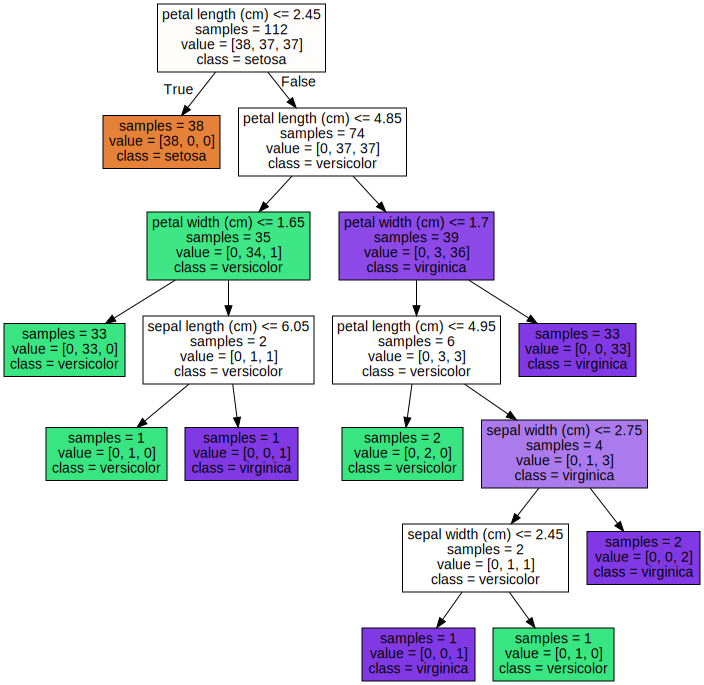

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_iris.dot", class_names=["setosa", "versicolor", "virginica"],
                feature_names=iris.feature_names, impurity=False, filled=True)

import graphviz

with open("tree_iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### Pre-prune the tree and visualize it

Instead of fully growing the trree until it perfectly classifies all training examples, we can grow it up to a certain depth, e.g. 4 as in the example below. The class label is detremine by the majority class of the leaf nodes. This is simple method to reduce overfitting.

There are more sophisticated approaches for preventing overfitting, both pre-pruning and post-pruning:
- Pre-pruning stops growing the tree before it perfectly fits the training data. Restricting the tree depth is an example of this approach but there are other approaches, e.g. based on validation set performance
- Post-pruning involves fully growing the tree, allowing it to fit the training data, and then pruning the tree. The main pruning methods are sub-tree replacement, sub-tree raising and rule pruning.

In [5]:
#Apply pre-pruning by limiting the depth of the tree - max_depth=4
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree.fit(X_train, y_train)

#Evaluate its performance on the training and test set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.921


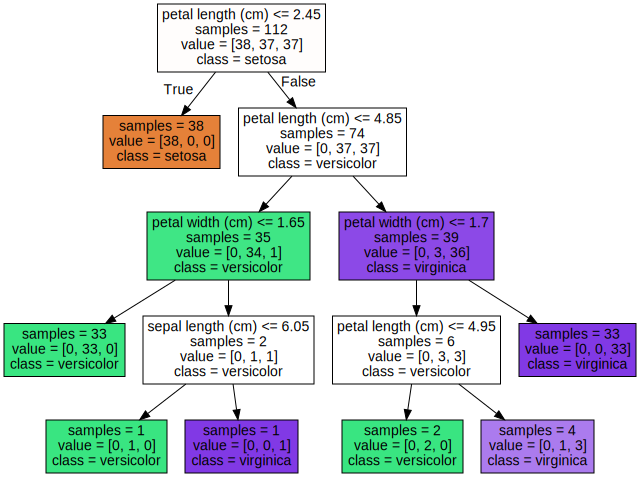

In [6]:
#Visualize the tree
export_graphviz(tree, out_file="tree_iris_pruned.dot", class_names=["setosa", "versicolor", "virginica"],
                feature_names=iris.feature_names, impurity=False, filled=True)
with open("tree_iris_pruned.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Task
Experiment also with max_depth=2 and visualiaze the tree. Compare the accuracy of the original unprunned tree and the two prunned trees. How does the accuracy on the training and test set changes?

Accuracy on training set: 0.964
Accuracy on test set: 0.921


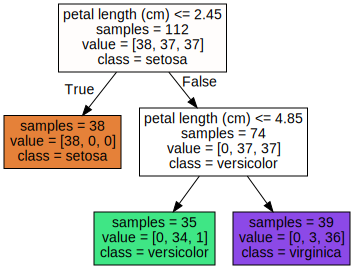

Accuracy of unprunned tree on training set: 0.964
Accuracy of unprunned tree on test set: 0.921
Accuracy of pruned tree (max_depth=4) on training set: 0.964
Accuracy of pruned tree (max_depth=4) on test set: 0.921
Accuracy of pruned tree (max_depth=2) on training set: 0.964
Accuracy of pruned tree (max_depth=2) on test set: 0.921


In [7]:
# Apply pre-pruning by limiting the depth of the tree - max_depth=2
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
tree.fit(X_train, y_train)

# Evaluate its performance on the training and test set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Visualize the tree
export_graphviz(tree, out_file="tree_iris_pruned_2.dot", class_names=["setosa", "versicolor", "virginica"],
                feature_names=iris.feature_names, impurity=False, filled=True)
with open("tree_iris_pruned_2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Compare the accuracy of the original unprunned tree and the two prunned trees.
print("Accuracy of unprunned tree on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of unprunned tree on test set: {:.3f}".format(tree.score(X_test, y_test)))

print("Accuracy of pruned tree (max_depth=4) on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of pruned tree (max_depth=4) on test set: {:.3f}".format(tree.score(X_test, y_test)))

print("Accuracy of pruned tree (max_depth=2) on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of pruned tree (max_depth=2) on test set: {:.3f}".format(tree.score(X_test, y_test)))

# How does the accuracy on the training and test set changes?
# The accuracy on the training set generally increases as the tree depth increases.
# This is because the tree is able to better fit the training data as it grows deeper.
# However, the accuracy on the test set may not necessarily increase as the tree depth increases.
# This is because the deeper tree may be overfitting the training data and not generalizing well to unseen data.


### Questions:

#### 1. Apart from reducing overfitting, can you think of another advantage of pruning?

- Reduce the time and memory
- Improved interpretabilitiy as the tree will be smaller
- It is easier to visualize and understand
- ...

#### 2. Compare decision trees with k-nearest neighbor and linear regression. What advantages do they offer?

- Can be easily visualized and understood even by non-experts or clients
- Can also form complex non-linear decision boundaries, an advantage over linear regression models

## 3. Ensembles


### **Basics of Ensemble Learning**

Combine the predictions of **multiple individual models** to create a more accurate and robust prediction.

$→$ Improve the accuracy and robustness of machine learning models.

#### **Bagging (or Bootstrap aggregating)**: trains several copies of the same base model using various bootstrap samples (random sampling with replacement) of the training data.

<img src="https://media.licdn.com/dms/image/D5612AQG4jh9xE7hFCQ/article-inline_image-shrink_1500_2232/0/1691242656293?e=1716422400&v=beta&t=spZBOHysfLM0pBzjmMmZW36OcZbQglzT2I_Mpjw4GWk" width=600>

The method involves:
1. Creating multiple subset from the orginial dataset with replacement
2. Building a base model for each of the subsets
3. Running all the models in parallel
4. Combining prediction from all models to obtain final predictions

#### **Boosting**: trains multiple models sequentially, with each model being trained to correct the mistakes of the previous models.

<img src="https://media.licdn.com/dms/image/D5612AQElJNXciO_-5Q/article-inline_image-shrink_1500_2232/0/1691242750295?e=1716422400&v=beta&t=HmtqmIxyoN7ypvhW-f-kvHtLJSBS6ku3ncELASYpUOs" width=600>

1.   Creating a subset from the original data
2.   Building an initial model with this data
3.   Running predictions on the whole dataset
4.   Calculating the error using the predicitions and the actual values
5.   Assigning more weight to the incorrect predictions
6.   Creating another model that attempts to fix errors from the last model
7.   Running predictions on the entire dataset with the new model
8.   Creating several models with each model aiming at correcting the errors generated by the previous one
9.   Obtaining the final by weighting the mean of all the model


### **Popular Ensemble Methods**

### Load the Moons dataset

We will use the <b>moons</b> dataset to show and compare the decision boundaries of ensemble methods. This dataset has 2 classes and 2 features. The data points form 2 half circles (moons), hence the name of the dataset. Let's generate and plot the data:

![](https://www.researchgate.net/profile/Toufiq-Parag/publication/273788317/figure/fig3/AS:613995643953152@1523399377046/a-synthetic-two-moon-dataset-with-and-representing-two-classes-b-c-predictions.png)

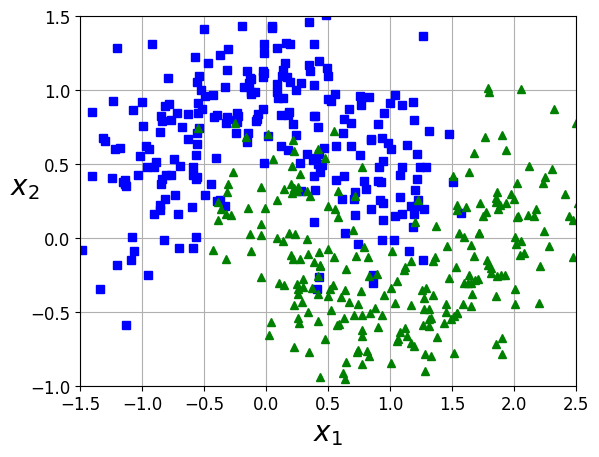

In [20]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 3.1 Bagging

Bagging creates bootstrap samples from the training data using sampling with replacement and builds a separate classifier for each of them. To classify a new example, the decisions of the individual classifiers are combined using majority vote.

The following code trains a Bagging ensemble of 500 decision trees; each tree is trained on 100 examples randomly sampled from the training data.

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("Bagging ensemble of decision trees - accuracy on test set:")
print(accuracy_score(y_test, y_pred))

Bagging ensemble of decision trees - accuracy on test set:
0.904


### Comparing a single decision tree with a bagging ensemble of decision trees

Let's build a single decision tree for the <b> moons </b> dataset and compare the accuracy with the Bagging ensemble of decision trees from the previous step.

In [22]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Accuracy on test set:")
print(accuracy_score(y_test, y_pred_tree))

Accuracy on test set:
0.856


Now let's plot the decision boundaries:

Saving figure Decision_tree_without_and_with_bagging_plot


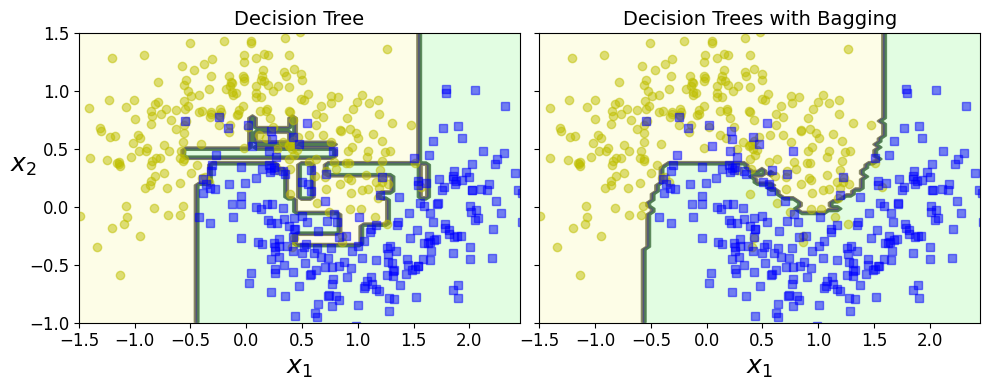

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
save_fig("Decision_tree_without_and_with_bagging_plot")
plt.show()

We can see that Bagging forms **a smoother (less irregular) decision boundary** than the single decision tree, and hence is more more likely to work well on new data.

Our accuracy results on the test data show that Bagging is more accurate than the single decision tree.


## 3.2 Random Forests

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*qPCOcn6jdOETLlBlK2zhjA.png" width=600>

A Random Forest is a collection of decison trees. Each tree should be reasonably accurate but also different from the others, which is achhieved by introducing randomness in two ways: by using bootstrap sample and considering only a subset of the attributes for each split when building the decision tree. Each tree is fully grown to fit the training data; the individual trees are likely to overfit on different parts of the data and when the predictions are combined, the amount of overfitting is reduced.

The following code creates a Random Forest classifier consisting of 500 trees:

In [24]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print("Random forest ensemble - accuracy on test set:")
print(accuracy_score(y_test, y_pred_rf))

Random forest ensemble - accuracy on test set:
0.912


Let's plot the decision boundary:

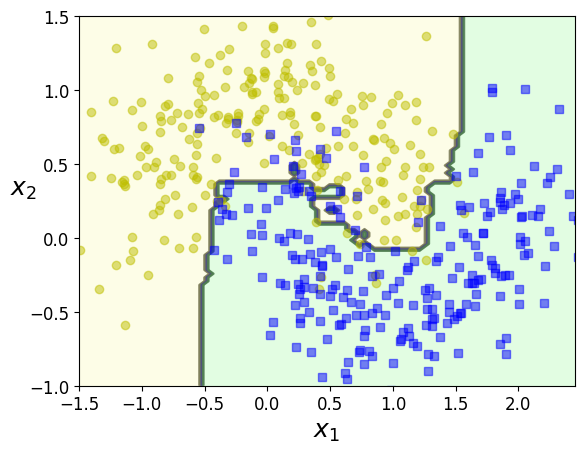

In [25]:
plot_decision_boundary(rnd_clf, X, y)

The Random Forest gives us an accuracy of 0.912, which is better than the single decision tree, and this is achieved without tuning any parameters.

An important parameter to tune is <b> max_features</b> - the number of features to consider when looking for the best split; the default is max_features=sqrt(n_features), see:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

As we increase the number of features, the decision trees part of the ensemble become more accurate but also more similar to each other, which increases the overfitting and in turn reduces the accuracy of the ensemble.

### Tasks:

#### 1. Experiment with different number of trees and observe the changes in accuracy. For example, try 5, 10, 50, 100, etc. You can even plot a graph showing accuracy vs number of trees. When does the accuracy flatens and stops improving?

##### Solution

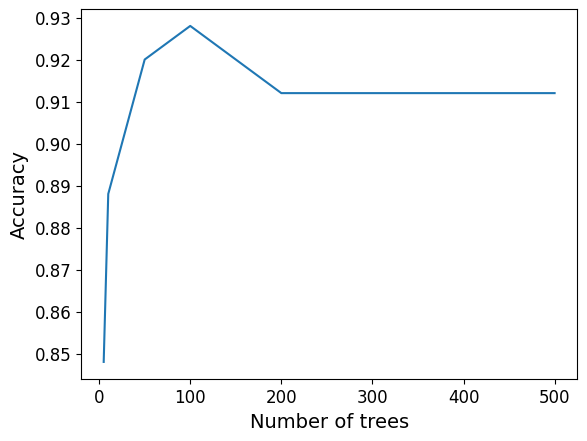

Number of trees: 5, Accuracy: 0.848
Number of trees: 10, Accuracy: 0.888
Number of trees: 50, Accuracy: 0.92
Number of trees: 100, Accuracy: 0.928
Number of trees: 200, Accuracy: 0.912
Number of trees: 500, Accuracy: 0.912


In [32]:
from sklearn.metrics import accuracy_score
# Experiment with different number of trees and observe the changes in accuracy.
# For example, try 5, 10, 50, 100, etc.
# You can even plot a graph showing accuracy vs number of trees.
# When does the accuracy flattens and stops improving?

# Create a list of different number of trees to experiment with.
num_trees = [5, 10, 50, 100, 200, 500]

# Create a list to store the accuracy scores.
accuracy_scores = []

# Loop through the list of number of trees.
for num_tree in num_trees:
    # Create a Random Forest classifier with the current number of trees.
    rnd_clf = RandomForestClassifier(n_estimators=num_tree, max_leaf_nodes=16, random_state=42)

    # Fit the classifier on the training data.
    rnd_clf.fit(X_train, y_train)

    # Predict the labels of the test data.
    y_pred_rf = rnd_clf.predict(X_test)

    # Calculate the accuracy score.
    score = accuracy_score(y_test, y_pred_rf)

    # Append the accuracy score to the list.
    accuracy_scores.append(score)

# Plot the accuracy vs number of trees graph.
plt.plot(num_trees, accuracy_scores)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

# Print the accuracy scores.
for num_tree, accuracy_score in zip(num_trees, accuracy_scores):
    print(f"Number of trees: {num_tree}, Accuracy: {accuracy_score}")

# When does the accuracy flattens and stops improving?
# The accuracy flattens and stops improving around 200 trees.


#### 2. What are the disdavantages of Random Forest compared to a single decision tree?

##### Solution

- *Loss of interpretability* - not possible to interpret hundreds of decision trees, and the trees in Random Forest also tend to be bigger as there is no pruning (in the original version of the algorithm)
- *Computationally expensive* on large datsets

## 3.3 Boosting

In boosting the models are trained sequentially, with the new models trying to classify correctly the examples that were difficult for the previous ones. There are many boosting methods; the most popular are AdaBoost and Gradient Boosting.

AdaBoost uses the idea of weighted training set - the higher the weight of an example, the more difficult it was for the previous classifiers. It trains a classifier, evaluates its performance on the training data and then increases the weights of the misclassified training examples. Then it trains a second classififier using the updated weights, again makes predictions on the training data, updates the weights of the training data and so on. Once all models are trained, their predictions are combined using weighed vote based on their accuracy on the training data. For more information, please se the lecture slides and textbooks.

Gradient Boosting also works by sequentially adding new  models to the ensemble, with each new model trying to predict correctly the misclassified examples by the previous models. But instead of changing the weights of the training examples, it adds a new prediction model which is trained to minimize the error of the previous models.

Both AdaBoost and GradientBoosting typically combine decision trees, in particular shallow decision trees (e.g. decision stumps which are 1-level decision trees).

The following code shows how to implement AdaBoost and Gradient Boosting in sklearn.

### AdaBoost

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*kPazgmGTBHDMb8kVwesxbg.png" width=600>

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print("AdaBoost ensemble - accuracy on test set:")
print(accuracy_score(y_test, y_pred_ada))

AdaBoost ensemble - accuracy on test set:
0.896


Plot the decision boundary:

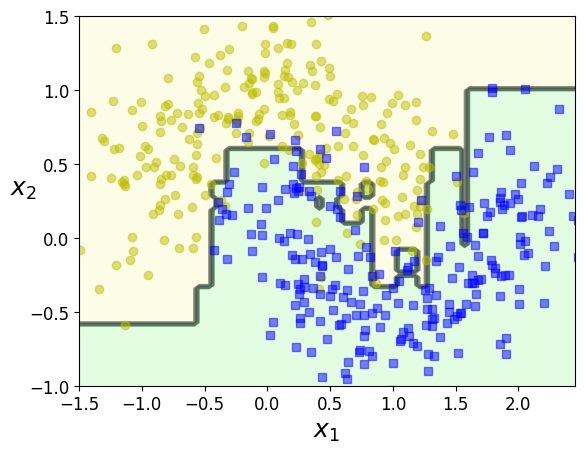

In [15]:
plot_decision_boundary(ada_clf, X, y)

### Gradient Boosting

Training the next model on the errors of the last model.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/01/Gradient-Boosting-tree-scaled.jpg" width=600>

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=1, n_estimators=200, learning_rate=0.2, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting - accuracy on test set:")
print(accuracy_score(y_test, y_pred_gb))

Gradient Boosting - accuracy on test set:
0.896


Plot the decision boundary:

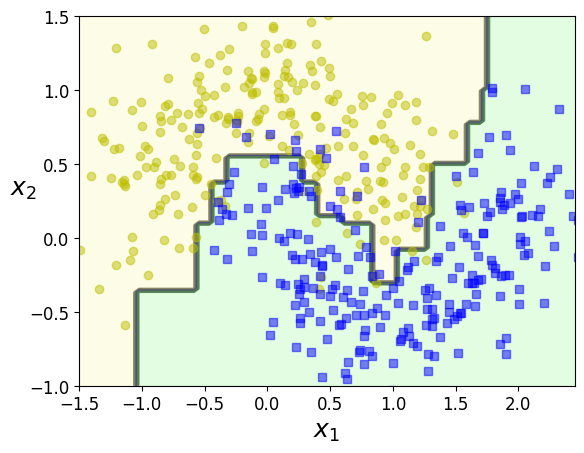

In [17]:
plot_decision_boundary(gb_clf, X, y)

## Summary

In [18]:
tree = DecisionTreeClassifier()
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5)
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2)

### Acknowledgements

This tutorial is based on:

Aurelien Geron (2019). Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, O'Reilly.

Andreas C. Mueller and Sarah Guido (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists, O'Reilly.